### Note:

**First let's set the runtime to GPU -- click on 'runtime' in the menu above, select 'Change runtime type' and pick 'GPU'.**

In [1]:
!nvidia-smi

Thu Mar 30 23:14:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# A First Look at Deep Learning using Keras  

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/keras22.png)



This notebook is intended to be a first quick hands-on introduction to deep learning using TensorFlow and Keras. 


First, let's cover a few definitions.

#### Tensor
Tensors, like arrays and matrices, are containers for numbers. For now, it is fine to think of tensors as arrays. Tensors have three defining characteristics. 

1. **Number of Axes or Dimensions**
2. **The shape**
3. **The Type of Data Stored in the Tensor**

For example, the tensor `x` below 

* has one axis (it is one dimensional).
* its shape is represented by the tuple `(4)` --- there are 4 elements in that one axis.
* the datatype is `uint8` (the tensor contains integers).

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/tensors43.png)

The tensor `y`

* has 2 axis (2 dimensional)
* its shape is (3,4). Along one axis there are 3 rows and along the other, 4 columns
* the datatype is `uint8`

Finally, the tensor `z` 

* has 3 axis   -- it is 3 dimensional
* its shape is (2, 3, 4)
* the datatype is `uint8`

**Tensors are the fundamental datatype for deep learning systems.**


### Keras
Keras is open source software that functions as an abstract interface to TensorFlow. 

My difficulty ranking of deep learning libraries (from easiest to hardest) is 

1. Keras
2. PyTorch
3. TensorFlow

All have their strengths and it is difficult to recommend which one a beginner should start with. The excellent, free, Open.ai course uses PyTorch. However, in our exploration of deep learning we will start with Keras. In your path toward deepening your knowledge in machine learning you will likely encounter all three.

# A first look at a neural network
Let's go back to the example of recognizing hand written digits. 


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/mmnist.png)

We are using the MNIST dataset (Modified National Institute of Standards) which is a dataset of 60,000 training instances and 10,000 testing instances of 28x28 grayscale images of the digits 0 through 9. This dataset was created in the 1980s as a testbed for various research groups. Back then it was considered a hard problem. Today it is considered the "hello world" equivalent in deep learning and you will see it again and again on your path learning about machine learning. 




# Prelim steps

## 1. Import Keras


In [2]:
import keras
keras.__version__ 

'2.12.0'



## 2. Define the datasets we are going to use.




The MNIST dataset is so common that Keras knows how to download the data into a set of four Numpy arrays:

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. The Keras version of this dataset encodes the images as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

## 3. Examining the data

As already mentioned, each digit in the data is represented by a 28x28 pixel image:


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/mnist2.png)

This is represented as a 2 dimensional array of 28 rows and 28 columns. The gray scale at each location is represented by a number. Total white is represented by 0, total black as 255, and shades of gray are represented by numbers between those two. 

Just for a sanity check, let's see if this format matches a sample of our training data. Let's get the first batch of our data:

In [4]:
train_images.shape

(60000, 28, 28)

That is not surprising---so 60,000 images that are a 28x28 array of pixel values

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# The data
To get an idea of what the data looks like let's display a few images.

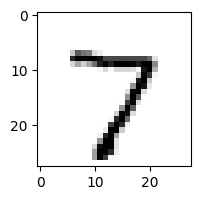

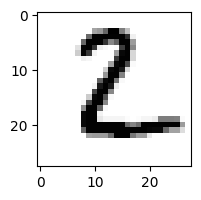

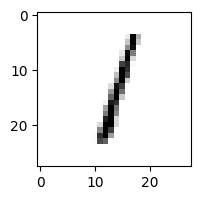

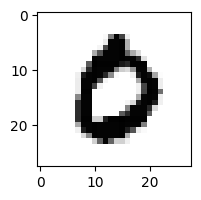

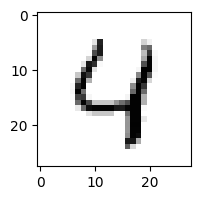

In [7]:
import matplotlib.pyplot as plt

def viewImage(x):
    plt.figure(figsize=(2,2))
    plt.imshow(x, interpolation='nearest', cmap='Greys')
    plt.show()
    
viewImage(test_images[0])
viewImage(test_images[1])
viewImage(test_images[2])
viewImage(test_images[3])
viewImage(test_images[4])




and let's look at the associated labels:

In [8]:
test_labels[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)

# Our deep learning network design.

Let us now turn our attention to the deep learning network we will implement.

The input to our deep learning network will be a 28x28 image. Instead of using the two dimensional 28 x 28 representation, for simplicity we will flatten the image into a sequence of 784 pixels (28 times 28). These 784 pixel values will be our input. There are 10 possible outputs representing the digits 0 through 9. Thus, the architecture of our input values and output nodes looks like this:


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/dense1a.png)

Between the input and the output we will have one or more hidden layers. *Hidden layers* are simply the layers of nodes between the input and the output. 

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/hiddenpyt.png)


For our initial network we are going to have one hidden layer of 256 nodes. The layer will be densely connected (also called *fully connected*) meaning that each input  (in this case each pixel) is connected to each node in the inner layer:

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/connect1p.png)


So each of the 784 pixel values is connected to each of the 256 nodes of the hidden layer.

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/connect2p.png)

Let's examine one of these nodes in the hidden layer in more detail. Each node has 784 inputs and each of these inputs has an associated weight. So *input<sub>1</sub>* has an associated *weight<sub>1</sub>*, *input<sub>2</sub>* has an associated *weight<sub>2</sub>* and *input<sub>784</sub>* has an associated *weight<sub>784</sub>*. Also, each node has an additional weight *weight<sub>0</sub>*. 


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/relu2.png)

Each node multiplies its input by the associated weights:

$$
total = \sum_{i=0}^{784}{x_i w_i}
$$

Since the inputs are represented by a tensor and the weights are as well, this operation can be done very efficiently on the parallel architecture of a GPU. Next, the node determines its output based on this total weighted input, using an **activation function**. One common activation function is **ReLU** (rectified linear unit) and is defined by 

$$
relu(total) = \max(0, total)
$$

So the output of a single node is

$$
output = \max(0, \sum_{i=0}^{784}{x_i w_i})
$$

Since each node has 785 weights and there are 256 nodes in our hidden layer, there are 200,960 weights in that layer. 


#### Output layer
The output layer is also densely connected, mean each node in the hidden layer will be connected to each of the output nodes. 

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/connect3p.png)


Resulting in a dense, or fully connected network.

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/connect4p.png)


Each node in the output layer has 256 + 1 weights (256 because each node in the output layer is connected to each of the outputs of the 256 nodes in the hidden layer). Thus, there are 2,570 trainable parameters in the output layer for a total of 203,530 trainable parameters. These weights, or trainable parameters, are what the model learns during the training phase. Typically, these parameters are initially set to random numbers.

The network in these images is shown with the input on the left and the output on the right and the processing proceeds left to right. The hidden layer performs the calculations described above Each node in the hidden layer has a specific output and these outputs are then processed by the output layer. If we had more layers to our network (for example, three hidden layers), the progression on calculations would be similar. When processing proceeds in this direction it is known as **forward propagation**. *Forward* meaning that the calculations proceed from the initial inputs to the final output.  Using forward propagation, the networks takes inputs representing an image of the number 4 as an example and the network makes a prediction which may be correct (*it is a 4*) or incorrect (*it is a 9*). In what is called a **back propagation** step, the system uses the actual label and the prediction to adjust the weights throughout the network. This will be described in more detail later.

As François Chollet, creator of Keras says:  

> The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

 

#### The total network.
This network image above represents the basic architecture of our system

* 784 inputs (the pixels of the MNIST image)
* 256 densely connected nodes of the hidden layer
* 10 output nodes represented the 10 possible classifications of an image (the digits 0 through 9)

### Implementing in Keras

Just to introduce some code, let us look how to implement this architecture:

```
from keras import models
from keras import layers

input_size=784 
hidden_size = 256
output_size = 10

network = models.Sequential()
network.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
network.add(layers.Dense(output_size, activation='softmax'))

```

First, we set up some variables representing, as the variable names suggest, the input size (the 28 by 28 image contains 784 pixels, the number of hidden nodes (256), and the number of classes in the output (10).

Next, we define `network`. `Sequential` creates a sequential container, which means that the layers we add are organized sequentially.

The `add` method adds a layer to the network.

* `Layers.dense` creates a dense (fully connected) layer. 
  * The first parameter is the size of the hidden layer---in our case `hidden_size`
  * `activation=relu,` specifies we are using the ReLU activation function.
  * `input_shape` specifies, as the name suggests, the shape of the input. In our case the 784 pixels of the image.
* `network.add(layers.Dense(output_size, activation='softmax'))` Next we add another densely connected layer to our network. 
  * `output_size` There will be 10 nodes in this layer. Each node represents one of the possible labels for the image--the digits 0 through 9.
  * `activation='softmax',` specifies we are using the softmax activation function. This function will give us the probabilies of the possible labels. (For ex., 80% sure it is a '5', etc)


If we instead wanted 64 nodes in our hidden layer our code would be



```
from keras import models
from keras import layers

input_size=784 
hidden_size = 64
output_size = 10

network = models.Sequential()
network.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
network.add(layers.Dense(output_size, activation='softmax'))

```

And if we wanted a network with two hidden layers , the first with 256 nodes and the second with 64 nodes we might code it...

```
from keras import models
from keras import layers

input_size=784 
hidden_size = [256, 64]
output_size = 10

network = models.Sequential()
network.add(layers.Dense(hidden_size[0], activation='relu', input_shape=(input_size,)))
network.add(layers.Dense(hidden_size[1], activation='relu'))
network.add(layers.Dense(output_size, activation='softmax'))

```






### Workflow


Our workflow will be as follow: 

1. we will create a neural network containing a fully connected hidden layer.
2. we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels by adjusting the 2,570 weights.
3. we will ask the network to produce predictions for `test_images`
4. we will verify if these predictions match the labels from `test_labels`.

#### Let's build our network.

In [9]:
from keras import models
from keras import layers

input_size=784 
hidden_size = 256
output_size = 10

network = models.Sequential()
network.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
network.add(layers.Dense(output_size, activation='softmax'))


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.


#### Compiling the model.
To make our network ready for training, we need to pick three more things, as part of a compilation step:

* An **optimizer**: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* A **loss function**: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* **Metrics** to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

Keras makes this compilation step easy:

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Why did we select categorical crossentropy as the loss function? From the Tensorflow documentation:

> Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation. If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss. There should be # classes floating point values per feature.

Note that the documentation says that we need to one_hot encode the labels. You probably already know this but that means if we are labeling pictures of dogs, cats, squirrel and moose and our test_labels look like

picture | label
:---:   | :---
1.  | dog
2. | dog
3. | cat
4. | squirel
5. | cat
6. | moose

We will one_hot encode this resulting in 


picture | dog | cat | squirrel | moose
:---: | :----: |:--: | :---: | :---:
 1.     | 1 | 0 | 0 | 0
 2. | 1 | 0| 0 | 0
 3. | 0 | 1 | 0 | 0
 4. | 0 | 0 | 1 | 0
 5. | 0 | 1 |0 | 0
 6. | 0|0|0|1

And again, the `metrics=['accuracy']` line means that we are calculating the percentage of predicted values that match with actual values.


### Preprocessing the data
Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In other words, each image in our original data was a 28x28 array of integers ranging from 0 to 255. We are going to transform the integers 0-255 to a float between 0 and 1. In addition we are going to flatten each image array to look like

```
[0, 1, 2, 3, 4, 5 ... 784 ]
```


In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
test_images[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Here's a question:
Why are we dividing each pixel by 255? What did the original number represent?

#### Encode the labels
We also need to categorically encode the labels:

In [12]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)

## <font color='#EE4C2C'>1. What does the first test label look like? (print it out)</font> 

In [13]:
print(test_labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Training our first deep learning model

We are now ready to train our network, which, unsurprisingly, in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 12s 5ms/step - loss: 0.2919 - accuracy: 0.9183
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1272 - accuracy: 0.9631
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0871 - accuracy: 0.9741
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9804
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0513 - accuracy: 0.9848


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9794


In [16]:
print('test_acc:', test_acc)

test_acc: 0.9793999791145325



Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)

## <font color='#EE4C2C'>2. Accuracy with 7 epochs</font> 
What is the accuracy on our test data if we use 7 epochs?  You will need to build, compile, and fit a new model.

### Build

In [17]:
input_size = 784
hidden_size = 256
output_size = 10

# Build the model
model = models.Sequential()
model.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
model.add(layers.Dense(output_size, activation='softmax'))

### Compile

In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Fit

In [19]:
model.fit(train_images, train_labels, epochs=7, batch_size=128)

Epoch 1/7
469/469 [==============================] - 2s 3ms/step - loss: 0.2951 - accuracy: 0.9174
Epoch 2/7
469/469 [==============================] - 1s 3ms/step - loss: 0.1280 - accuracy: 0.9625
Epoch 3/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0861 - accuracy: 0.9744
Epoch 4/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9804
Epoch 5/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0506 - accuracy: 0.9854
Epoch 6/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0413 - accuracy: 0.9874
Epoch 7/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0324 - accuracy: 0.9907


### Accuracy

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9768
Test accuracy: 0.9768000245094299


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)

## <font color='#EE4C2C'>3. Accuracy without training</font> 
What is the accuracy on our test data using our network before we do any training (before `fit`)? You will need to build, and compile a new model.

In [21]:
input_size = 784
hidden_size = 256
output_size = 10


model = models.Sequential()
model.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
model.add(layers.Dense(output_size, activation='softmax'))

In [22]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy (before training):', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.3684 - accuracy: 0.0935
Test accuracy (before training): 0.09350000321865082


### Training
As you can see from your above experiment, before we fit the model the accuracy was not very good. Before training, the weight are set at random (not exactly, but let's keep it simple for now). 




![](http://zacharski.org/files/courses/cs419/deepLearning.png)

When we were fitting the model:

     network.fit(train_images, train_labels, epochs=5, batch_size=128)
    
we processed 128 images at a time (this is called batch_size). Everytime we processed the images in that batch we calculated the loss and adjusted the weights to improve the network's  performance. Each time we go through the entire dataset we call it an epoch. So in our initial training, we went through the dataset 5 times.  Once we have gone through the data 5 times we stop and now we have a trained neural network. 'Trained' simply means that we have a network with the weight adjusted to reduce loss.

#### Epochs 
Again, epochs are how many times we go through the training data. You may wonder, are more epochs always better. Stop for a moment and ponder this. 

* .
* .
* .
* .
If you need a clue let me mention bias and variance. 

In the next notebook we will be displaying both the accuracy on the training data and the accuracy on the validation error.  If at some point you see the training data accuracy still going gradually down, but the validation error going up. You may be overfitting your data.


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)

## <font color='#EE4C2C'>4. Fashion</font> 

As a small first step try out the FashionMNIST dataset.


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/clothing.gif)


The dataset consists of small 28x28 grayscale image icons of different articles of clothing. There are 60,000 images in the training set and 10,000 in the test set. Each image has an associated label from a list of 10:


| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |



#### The files

* Training set: [clothes_train.csv](http://zacharski.org/files/courses/cs419/clothes_train.csv)
* Test set: [clothing_test.csv](http://zacharski.org/files/courses/cs419/cTest.csv) Note: Don't use the test set for training.

Can you create a network with one hidden layer similar to the example above and train it?


In [23]:
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from keras.utils import to_categorical

In [24]:
# Load the data
train_data = pd.read_csv('http://zacharski.org/files/courses/cs419/clothes_train.csv')
test_data = pd.read_csv('http://zacharski.org/files/courses/cs419/cTest.csv')

In [25]:
train_images = np.array(train_data.iloc[:, 1:])
train_labels = np.array(train_data.iloc[:, 0])

test_images = np.array(test_data.iloc[:, 1:])
test_labels = np.array(test_data.iloc[:, 0])


In [26]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [27]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [28]:
input_size = 28 * 28
hidden_size = 128
output_size = 10

model = models.Sequential()
model.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
model.add(layers.Dense(output_size, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5818 - accuracy: 0.7961
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.8519
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3701 - accuracy: 0.8676
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3415 - accuracy: 0.8770
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3230 - accuracy: 0.8833


### What is its accuracy on the test data?

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3386 - accuracy: 0.8773
Test accuracy: 0.8773000240325928


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)

## <font color='#EE4C2C'>5. Two Hidden Layers</font> .
Can you construct and train a new network that has two hidden layers 
(as before, the first layer can have 512 neurons - the second should have 256)? What is its accuracy on the test data? 

In [30]:
train_images = np.array(train_data.iloc[:, 1:])
train_labels = np.array(train_data.iloc[:, 0])

test_images = np.array(test_data.iloc[:, 1:])
test_labels = np.array(test_data.iloc[:, 0])

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [31]:
input_size = 28 * 28
hidden1_size = 512
hidden2_size = 256
output_size = 10

model = models.Sequential()
model.add(layers.Dense(hidden1_size, activation='relu', input_shape=(input_size,)))
model.add(layers.Dense(hidden2_size, activation='relu'))
model.add(layers.Dense(output_size, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.5457 - accuracy: 0.7996
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3799 - accuracy: 0.8599
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8757
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3097 - accuracy: 0.8836
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2897 - accuracy: 0.8917


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3736 - accuracy: 0.8619
Test accuracy: 0.8618999719619751


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)

## <font color='#EE4C2C'>6. Volcanos on Venus</font> 
![](https://upload.wikimedia.org/wikipedia/commons/1/16/Maat_Mons_on_Venus.jpg)


### First, no one has been to Venus
I felt I needed to say that upfront because we don't really know if there are volcanoes on Venus. An analysis of the data by experts is not 100% accurate so the labels are the experts best guess.

The images are from NASA's Magellan spacecraft which was launched on May 4, 1989 and made it to Venus on August 10, 1990. Magellan mapped the surface of Venus using synthetic aperture radar. Some images have black blocks in them caused by either problems with Magellan or with communication back to earth. 

### The data
The images are 110x110 grayscale pixels. The value of each pixel ranges from 0 to 255. Your task it to build a classifier that will predict whether a volcano is present in the image or not.

#### The files

* Training images: [volcanoes_train_images.csv](http://zacharski.org/files/courses/cs419/volcanoes_train_images.csv)
* Training labels: [volcanoes_train_labels.csv](http://zacharski.org/files/courses/cs419/volcanoes_train_labels.csv) 
* Testing images: [volcanoes_test_images.csv](http://zacharski.org/files/courses/cs419/volcanoes_test_images.csv)
* Testing labels: [volcanoes_test_labels.csv](http://zacharski.org/files/courses/cs419/volcanoes_test_labels.csv) 




## Tasks

There are 5 tasks

1. A simple task: Can you display a few of the images from the dataset?
2. Build a model with one hidden layer. Train it for 2 epochs. What is it's accuracy?
3. Build a model with one hidden layer. Train it for 10 epochs. What is it's accuracy? 
4. Does increasing the epochs beyond 10 improve accuracy?
5. Build a model with 2 hidden layers and test.

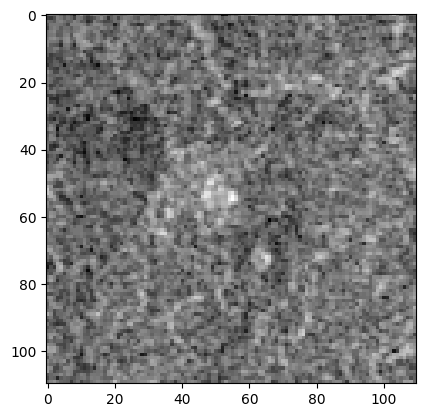

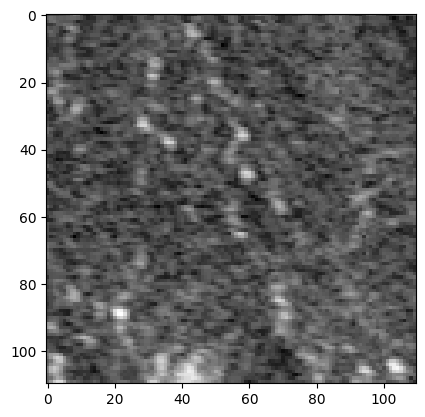

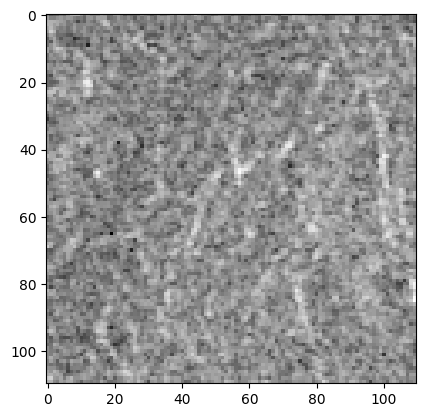

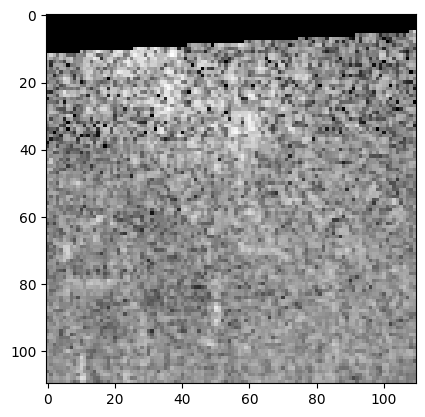

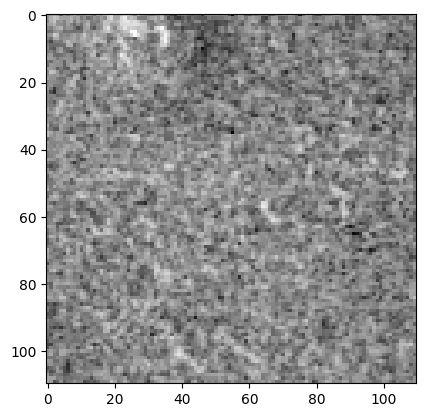

In [33]:
#1
import numpy as np
from matplotlib import pyplot as plt

# load the images
train_images = np.loadtxt('http://zacharski.org/files/courses/cs419/volcanoes_train_images.csv', delimiter=',')
# reshape the images
train_images = train_images.reshape((train_images.shape[0], 110, 110))

# display the first 5 images
for i in range(5):
    plt.imshow(train_images[i], cmap='gray')
    plt.show()

In [5]:
#2
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

# load the training data and labels
train_images = np.loadtxt('http://zacharski.org/files/courses/cs419/volcanoes_train_images.csv', delimiter=',')
train_labels = pd.read_csv('http://zacharski.org/files/courses/cs419/volcanoes_train_labels.csv', header=None, skiprows=1)

# replace any non-numeric values with 0
train_labels.replace('Volcano?', 0, inplace=True)
train_labels.replace('0', 0, inplace=True)
train_labels.replace('1', 1, inplace=True)

# extract the first column (which contains the volcano labels) as a numpy array
train_labels = train_labels.iloc[:, 0].values.astype(float)

# define the model architecture
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=110*110))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model for 2 epochs
model.fit(train_images, train_labels, epochs=2, batch_size=32)

# evaluate the model on the test data
test_images = np.loadtxt('http://zacharski.org/files/courses/cs419/volcanoes_test_images.csv', delimiter=',')
test_labels = pd.read_csv('http://zacharski.org/files/courses/cs419/volcanoes_test_labels.csv', header=None, skiprows=1)
test_labels.replace('Volcano?', 0, inplace=True)
test_labels.replace('0', 0, inplace=True)
test_labels.replace('1', 1, inplace=True)
test_labels = test_labels.iloc[:, 0].values.astype(float)
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', accuracy)


Epoch 1/2
219/219 [==============================] - 2s 4ms/step - loss: 26.7144 - accuracy: 0.8391
Epoch 2/2
86/86 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.8413
Test accuracy: 0.8412582278251648


In [6]:
#3
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

# load the training data and labels
train_images = np.loadtxt('http://zacharski.org/files/courses/cs419/volcanoes_train_images.csv', delimiter=',')
train_labels = pd.read_csv('http://zacharski.org/files/courses/cs419/volcanoes_train_labels.csv', header=None, skiprows=1)
train_labels.replace('Volcano?', 0, inplace=True)
train_labels.replace('0', 0, inplace=True)
train_labels.replace('1', 1, inplace=True)
train_labels = train_labels.iloc[:, 0].values.astype(float)

# define the model architecture
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=110*110))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model for 10 epochs
model.fit(train_images, train_labels, epochs=10, batch_size=32)

# evaluate the model on the test data
test_images = np.loadtxt('http://zacharski.org/files/courses/cs419/volcanoes_test_images.csv', delimiter=',')
test_labels = pd.read_csv('http://zacharski.org/files/courses/cs419/volcanoes_test_labels.csv', delimiter=',')
test_labels.replace('Volcano?', 0, inplace=True)
test_labels.replace('0', 0, inplace=True)
test_labels.replace('1', 1, inplace=True)
test_labels = test_labels.iloc[:, 0].values.astype(float)

loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', accuracy)


Epoch 1/10
219/219 [==============================] - 2s 4ms/step - loss: 63.1140 - accuracy: 0.7580
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 45.5694 - accuracy: 0.7590
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 4.5538 - accuracy: 0.7670
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.7521 - accuracy: 0.7974
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 0.7241 - accuracy: 0.8014
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 0.5069 - accuracy: 0.8329
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4012 - accuracy: 0.8570
Epoch 8/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3659 - accuracy: 0.8650
Epoch 9/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3710 - accuracy: 0.8693
Epoch 10/10
86/86 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.8369

increasing the number of epochs beyond 10 could improve the accuracy of the model. However, it's also possible that the model could start overfitting to the training data and actually decrease in accuracy on the test data. Depends on various factors such as the complexity of the model, the amount and quality of the training data, and the choice of hyperparameters such as the learning rate and batch size.

In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

# load the training data and labels
train_images = np.loadtxt('http://zacharski.org/files/courses/cs419/volcanoes_train_images.csv', delimiter=',')
train_labels = pd.read_csv('http://zacharski.org/files/courses/cs419/volcanoes_train_labels.csv', header=None, skiprows=1)
train_labels.replace('Volcano?', 0, inplace=True)
train_labels.replace('0', 0, inplace=True)
train_labels.replace('1', 1, inplace=True)
train_labels = train_labels.iloc[:, 0].values.astype(float)

# define the model architecture with 2 hidden layers
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=110*110))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model for 10 epochs
model.fit(train_images, train_labels, epochs=10, batch_size=32)

# evaluate the model on the test data
test_images = np.loadtxt('http://zacharski.org/files/courses/cs419/volcanoes_test_images.csv', delimiter=',')
test_labels = pd.read_csv('http://zacharski.org/files/courses/cs419/volcanoes_test_labels.csv', delimiter=',')
test_labels.replace('Volcano?', 0, inplace=True)
test_labels.replace('0', 0, inplace=True)
test_labels.replace('1', 1, inplace=True)
test_labels = test_labels.iloc[:, 0].values.astype(float)

loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', accuracy)


Epoch 1/10
219/219 [==============================] - 3s 5ms/step - loss: 8.5606 - accuracy: 0.8164
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 0.6249 - accuracy: 0.8526
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 0.5580 - accuracy: 0.8571
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.5180 - accuracy: 0.8571
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4882 - accuracy: 0.8571
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4660 - accuracy: 0.8571
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4493 - accuracy: 0.8571
Epoch 8/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4369 - accuracy: 0.8571
Epoch 9/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4278 - accuracy: 0.8571
Epoch 10/10
86/86 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.8413
T

#### Remix
Remix by Ron Zacharski. Orginal Python notebook by François Chollet

### MIT License

Copyright (c) 2017 François Chollet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.